In [24]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [25]:
#read houseprice dataset

df = pd.read_csv('A2_Data/House_Price.csv', index_col='Id') #identify id so not interpreted as feature

In [26]:
#make train and test data

training, testing = train_test_split(df, test_size=0.30, random_state=309) #split data -> training/testing
print("Data shape: ", df.shape)

Data shape:  (1460, 80)


In [27]:
# 1. (20  marks)  Determine and describe the  data  preprocessing  steps  applied  to  the  provided  dataset,  e.g.  handle 
# missing  data,  encoding  categorical  data,  normalise  the  data  if  necessary,  and/or  remove  any  unnecessary 
# instances, these could be redundant instances, outliers or non-effective instances and so forth. Show the process 
# in your code/workUlow. Submit copies of the processed training and test data (in CSV format).

#print shape of training set and print dataset

print("Training data shape: ", training.shape)
print("Training Set")
training #identify missing values (NaN)

Training data shape:  (1022, 80)
Training Set


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
448,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,199900
757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
1092,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,160000
1283,20,RL,61.0,8800,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,150500
878,60,RL,74.0,8834,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
1426,20,RL,80.0,10721,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,142000
994,60,RL,68.0,8846,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,173900


In [28]:
#print shape of testing set and print dataset

print("Test data shape: ", testing.shape)
print("Testing Set")
testing #identify missing values (NaN)

Test data shape:  (438, 80)
Testing Set


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1100,20,RL,82.0,11880,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,COD,Abnorml,157000
1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,128900
66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000
1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,190000
633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Family,82500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,245000
741,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,5,2007,WD,Abnorml,132000


In [29]:
# replace missing values

missing_train = training.isnull().sum() #cnt missing values in train and test
missing_test = testing.isnull().sum()

print("Missing Data in Train Data Count:\n", missing_train[missing_train > 0]) #print missing values excluding 0 in train and test
print("\nMissing Data in Test Data Count:\n", missing_test[missing_test > 0])

numerical_columns = training.select_dtypes(include='number').columns #identify numerical col
categorical_columns = training.select_dtypes(include='object').columns #identify categorical col

for col in numerical_columns: #for each col in numerical columns
    median_value_train = training[col].median() #find median value
    training[col].fillna(median_value_train, inplace=True) #replace NaN with median val in training
    testing[col].fillna(median_value_train, inplace=True) #replace NaN with median val in testing
for col in categorical_columns: #for each col in categorical columns
    training[col].fillna('NA', inplace=True) #replace NaN with 'NA' in training
    testing[col].fillna('NA', inplace=True) #replace NaN with 'NA' in testing

#check missing values after imputation
print("Missing Data After Imputation in Train Data (Categorical Columns):", training[categorical_columns].isnull().sum())
print("\nMissing Data After Imputation in Test Data (Categorical Columns):\n", testing[categorical_columns].isnull().sum())
print("\nMissing Data After Imputation in Train Data (Numerical Columns):\n", training[numerical_columns].isnull().sum())
print("\nMissing Data After Imputation in Test Data (Numerical Columns):\n", testing[numerical_columns].isnull().sum())

Missing Data in Train Data Count:
 LotFrontage      180
Alley            965
MasVnrType       598
MasVnrArea         4
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      477
GarageType        57
GarageYrBlt       57
GarageFinish      57
GarageQual        57
GarageCond        57
PoolQC          1017
Fence            817
MiscFeature      989
dtype: int64

Missing Data in Test Data Count:
 LotFrontage      79
Alley           404
MasVnrType      274
MasVnrArea        4
BsmtQual          9
BsmtCond          9
BsmtExposure     10
BsmtFinType1      9
BsmtFinType2     10
FireplaceQu     213
GarageType       24
GarageYrBlt      24
GarageFinish     24
GarageQual       24
GarageCond       24
PoolQC          436
Fence           362
MiscFeature     417
dtype: int64
Missing Data After Imputation in Train Data (Categorical Columns): MSZoning         0
Street           0
Alley            0
LotShape         0
La

In [30]:
#print shape of training set and print dataset

print("Training data shape: ", training.shape)
print("Training Set")
training #identify if missing values are replaced in training

Training data shape:  (1022, 80)
Training Set


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
448,60,RL,70.0,11214,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,7,2006,WD,Normal,199900
757,60,RL,68.0,10769,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2009,WD,Normal,212000
1092,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,WD,Normal,160000
1283,20,RL,61.0,8800,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2009,WD,Normal,150500
878,60,RL,74.0,8834,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2009,WD,Normal,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,120,RL,48.0,6240,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,12,2009,WD,Normal,254000
1426,20,RL,80.0,10721,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,10,2008,WD,Normal,142000
994,60,RL,68.0,8846,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2006,New,Partial,173900


In [31]:
#print shape of testing set and print dataset

print("Test data shape: ", testing.shape)
print("Testing Set")
testing #identify if missing values are replaced in testing

Test data shape:  (438, 80)
Testing Set


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1100,20,RL,82.0,11880,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2009,COD,Abnorml,157000
1262,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2009,WD,Normal,128900
66,60,RL,76.0,9591,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,10,2007,WD,Normal,317000
1259,80,RL,59.0,9587,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,7,2008,WD,Normal,190000
633,20,RL,85.0,11900,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2009,WD,Family,82500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,60,RL,70.0,8795,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2009,WD,Normal,236000
83,20,RL,78.0,10206,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,10,2008,WD,Normal,245000
741,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NA,GdPrv,NA,0,5,2007,WD,Abnorml,132000


In [32]:
# method to sort ordinal, nominal, numerical data

def sort_categorical_numerical(df, ordinal_columns):
    nominal = df.select_dtypes(include='object').columns #identify object columns in dataset
    numerical = df.select_dtypes(include='number').columns #identify number columns in dataset
    
    nominal = nominal.difference(ordinal_columns) #difference between nominal and ordinal columns
    numerical = numerical.difference(ordinal_columns).difference(['MSSubClass']) #remove MSSubClass from numerical columns
    
    return nominal, numerical #return nominal and numerical columns

In [33]:
# sort ordinal, nominal and numeric data in train and test

ordinal = [ #all ordinal data columns in dataset
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "KitchenQual", "HeatingQC", "ExterQual", "ExterCond", "GarageQual",
    "GarageCond", "Functional", "OverallQual", "OverallCond", "FireplaceQu",
    "GarageFinish", "PoolQC", "Utilities"
]

nominal_train, numerical_train = sort_categorical_numerical(training, ordinal) #sort categorical and numerical data in training
nominal_test, numerical_test = sort_categorical_numerical(testing, ordinal) #sort categorical and numerical data in testing

nominal_train = nominal_train.append(pd.Index(['MSSubClass'])) #append MSSubClass to nominal columns in training
nominal_test = nominal_test.append(pd.Index(['MSSubClass'])) #append MSSubClass to nominal columns in testing

# print ordinal, nominal and numerical column names
print("Ordinal Columns: ", ordinal)
print("\nNominal Columns in Train Data: ", nominal_train)
print("\nNominal Columns in Test Data: ", nominal_test)
print("\nNumerical Columns in Train Data: ", numerical_train)
print("\nNumerical Columns in Test Data: ", numerical_test)

Ordinal Columns:  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'HeatingQC', 'ExterQual', 'ExterCond', 'GarageQual', 'GarageCond', 'Functional', 'OverallQual', 'OverallCond', 'FireplaceQu', 'GarageFinish', 'PoolQC', 'Utilities']

Nominal Columns in Train Data:  Index(['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation',
       'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'MSSubClass'],
      dtype='object')

Nominal Columns in Test Data:  Index(['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation',
       'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope',
       'Lo

In [34]:
# encode ordinal, nominal and numeric data

# ordinal encoding -> ordinal data
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
training[ordinal] = ordinal_encoder.fit_transform(training[ordinal])
testing[ordinal] = ordinal_encoder.transform(testing[ordinal])

# one-hot encoding -> nominal data
training = pd.get_dummies(training, columns=nominal_train)
testing = pd.get_dummies(testing, columns=nominal_test)

# align train, test data
training, testing = training.align(testing, join='outer', axis=1, fill_value=0)

# scaler encoding -> numeric data
sc = MinMaxScaler()
training[numerical_train] = sc.fit_transform(training[numerical_train])
testing[numerical_test] = sc.transform(testing[numerical_test])

# print shape of training and testing data
print("Training Data Shape: ", training.shape)
print("Test Data Shape: ", testing.shape)

Training Data Shape:  (1022, 252)
Test Data Shape:  (438, 252)


In [35]:
# normalise the training and testing data

scaler = StandardScaler() #initialize scaler

training = pd.DataFrame(scaler.fit_transform(training), columns=training.columns) #standardize features in training
testing = pd.DataFrame(scaler.transform(testing), columns=testing.columns) #standardize features in testing

training.to_csv('output_data/processed_train.csv') #save processed training data
testing.to_csv('output_data/processed_test.csv') #save processed testing data

In [36]:
#print shape of training set and print dataset

print("Training data shape: ", training.shape)
print("Training Set")
training #identify processed data in training

Training data shape:  (1022, 252)
Training Set


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_NA,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.550298,1.379148,-0.099043,-0.185507,0.243038,-0.151733,1.406579,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,2.202820,-0.295059,0.0,-0.061161,0.897528,0.708786,-1.365600
1,-0.778666,1.313942,-0.099043,-0.185507,0.243038,-0.151733,0.144486,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,0.307802,-0.436468,0.0,0.376618,1.202484,1.097845,0.890288
2,-1.392722,0.675859,-0.099043,-0.185507,-4.114587,6.590507,-1.117607,-2.295635,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-1.587217,-1.024200,0.0,-0.769569,0.931412,0.757418,0.138326
3,-0.337154,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,0.144486,0.435609,-0.14128,-0.204436,...,5.349993,-0.070117,0.070117,-0.955544,-0.052012,0.0,-0.769569,0.185964,1.146477,0.890288
4,0.733638,0.987914,-0.099043,-0.185507,0.243038,-0.151733,1.406579,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,2.202820,0.880404,0.0,0.695004,1.100832,1.000580,0.890288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.383473,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,-1.117607,-2.295635,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-0.323871,0.575491,0.0,0.758681,1.168600,1.049212,0.890288
1018,0.200779,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,0.144486,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,0.307802,0.416406,0.0,-0.769569,-0.423948,-1.236509,0.138326
1019,-1.073007,0.959969,-0.099043,-0.185507,0.243038,-0.151733,0.144486,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-0.323871,-0.692773,0.0,-0.769569,1.134716,1.049212,-1.365600
1020,-1.758111,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,-2.379700,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-1.587217,-1.289342,0.0,-0.769569,-0.762788,-1.674200,-1.365600


In [37]:
#print shape of testing set and print dataset

print("Test data shape: ", testing.shape)
print("Testing Set")
testing #identify processed data in testing

Test data shape:  (438, 252)
Testing Set


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_NA,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.086339,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,0.144486,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,0.307802,0.458386,0.0,-0.769569,0.219848,-0.312494,0.890288
1,-0.311780,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,-1.117607,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-0.955544,-0.029917,0.0,-0.769569,-0.525600,-1.382406,0.890288
2,-0.075800,2.310656,-0.099043,-0.185507,0.243038,-0.151733,1.406579,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,1.571147,0.175568,0.0,0.758681,1.100832,1.000580,-0.613637
3,-0.017439,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,-1.117607,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-0.955544,-0.458564,0.0,0.917873,1.134716,1.000580,0.138326
4,0.604229,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,0.144486,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-0.323871,0.712481,0.0,0.758681,0.185964,-0.361126,0.890288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-0.489400,2.184903,-0.099043,-0.185507,0.243038,-0.151733,1.406579,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,0.939474,-0.246450,0.0,1.013389,0.965296,0.757418,0.890288
434,0.989917,-0.786610,-0.099043,-0.185507,0.243038,-0.151733,0.144486,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-0.323871,1.103566,0.0,0.376618,1.202484,1.097845,0.138326
435,-1.027333,0.759694,-0.099043,5.390624,-4.114587,-0.151733,-1.117607,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,0.307802,-1.766598,0.0,1.379532,-2.084263,0.854683,-0.613637
436,-0.996884,-0.227705,-0.099043,-0.185507,0.243038,-0.151733,-1.117607,0.435609,-0.14128,-0.204436,...,-0.266838,-0.070117,0.070117,-0.323871,-0.626487,0.0,-0.769569,-3.270203,0.562889,1.642251


Number of features to keep:  146
Explained Variance Ratio:  0.9503343511331919
PCA SHAPE FOR TRAIN (1022, 146)
PCA SHAPE FOR TEST (438, 146)


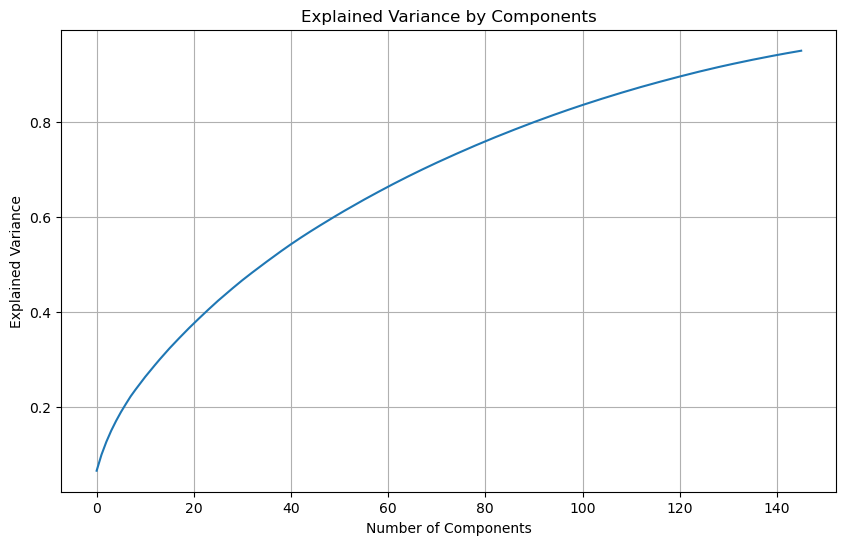

In [38]:
# 2. (15 marks) Utilise two different dimensionality reduction techniques to identify which features are irrelevant 
# and/or  redundant  to  predicting  the  house  price.  Report  the  dimension  reduction  process  and  remove 
# redundant/irrelevant data. Show the process in your code/workflow. 

#pca

pca = PCA(n_components=0.95) #initialize pca with 0.95 variance
pca_reduc_training = pca.fit_transform(training.drop(columns=['SalePrice'])) #fit/transform training with removed saleprice
pca_reduc_testing = pca.transform(testing.drop(columns=['SalePrice'])) #transform testing with removed saleprice

print("Number of features to keep: ", pca.n_components_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_.sum())
print("PCA SHAPE FOR TRAIN", pca_reduc_training.shape)
print("PCA SHAPE FOR TEST", pca_reduc_testing.shape)

#plot explained variance ratio by components

explained_variance = np.cumsum(pca.explained_variance_ratio_) #sum of explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(explained_variance) #plot explained variance
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [39]:
#print reduced training -> pca

pca_reduc_training = pd.DataFrame(pca_reduc_training)
pca_reduc_training

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,3.289588,2.437648,0.922639,-3.768000,-1.258809,1.224255,-3.246195,-0.266519,-0.347837,-0.565356,...,0.085213,0.061008,0.223106,0.290003,0.396908,-0.037946,-0.606621,0.172255,0.202334,0.272977
1,3.731572,1.909139,-0.658159,-2.475669,-0.938662,0.200414,-2.977696,0.022214,-0.563281,-0.568275,...,0.066644,0.453695,-0.355990,-0.102393,0.162560,0.330986,0.239430,-0.437421,-0.219615,0.593191
2,0.419516,3.674828,-5.824742,-2.840451,2.926466,-4.696455,2.479612,0.514470,-1.659928,3.972171,...,-0.502853,-0.688638,-0.787691,-0.123623,0.236564,-1.042107,0.993405,-0.336574,-0.138351,0.023778
3,-0.746245,-2.727868,-1.323032,-0.142587,-1.211421,0.414087,-0.693419,0.069349,-0.748221,0.175485,...,0.678089,0.390280,-0.043956,-0.394109,-0.470827,-0.019056,0.388260,-0.370582,0.536172,-0.256876
4,6.621438,2.202213,1.342125,-0.562487,-0.153683,0.317748,1.552437,-0.283012,-0.509832,-0.860385,...,0.149430,0.227622,0.857146,0.749222,0.489964,0.279389,-1.162072,0.733110,-0.483412,-0.272195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,3.487678,-0.411354,-3.069627,2.354186,1.880127,-1.478803,2.773569,0.374708,-1.734840,-0.416855,...,-0.132606,0.230801,0.834059,0.327975,0.224460,0.373426,-0.511802,-0.019111,0.422265,-0.451794
1018,-0.278882,-2.118108,-0.135970,1.025085,-1.517064,1.940893,1.937681,0.013272,-0.512252,0.587674,...,-0.057813,0.071873,0.159271,-0.118780,-0.262233,0.147952,0.043568,-0.183900,-0.364231,-0.046914
1019,3.380439,3.318770,-2.034515,-0.797263,-0.936323,1.490664,-2.972960,-0.239747,1.124083,1.437454,...,0.153403,0.135395,-0.284195,0.031794,-0.190894,-0.328231,0.093795,0.379361,-0.143936,-0.994458
1020,-7.330592,0.702802,-2.169866,4.056678,1.438581,1.427339,-2.173581,-1.404882,1.008445,-1.861387,...,0.360995,2.003040,0.496808,-1.871913,-0.845019,-1.518678,0.884711,-1.135940,0.788865,1.234747


In [40]:
#print reduced testing -> pca

pca_reduc_testing = pd.DataFrame(pca_reduc_testing)
pca_reduc_testing

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,1.175434,-3.185558,0.762463,0.155923,0.509029,1.922342,0.847359,0.040298,1.328174,2.155753,...,0.704103,-0.155472,0.003702,-1.204944,0.773965,0.894006,-0.137926,-0.869867,-0.585049,0.026766
1,-2.626958,-2.770207,-1.675378,1.234445,-1.235558,0.712500,1.243684,0.705167,-0.886583,1.310044,...,-0.416486,-0.215855,-0.429641,0.586247,-0.271876,-0.197482,-0.302890,-0.155710,-0.232021,0.383330
2,5.749743,3.820892,1.127575,-2.717012,-0.350071,0.898347,-0.168534,-0.396779,-0.219954,-0.001037,...,0.094382,0.204178,0.295441,0.511173,0.339319,0.710999,0.285959,-0.419342,0.940746,0.160821
3,3.383926,-0.733487,-1.620966,-0.616786,-0.542550,0.121333,-2.170092,-0.283607,0.607104,-2.330547,...,-0.476564,0.357984,-0.119442,-0.045413,-0.161082,-0.376368,-0.863762,0.549299,-0.309384,0.636841
4,0.797613,-3.797321,0.798014,0.361908,0.792536,1.340054,2.457958,-0.579721,0.177350,1.339645,...,-0.317439,0.812955,1.095197,0.323865,-0.025411,0.281734,-0.613711,-0.855149,0.313664,-0.171326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3.844094,2.815462,0.873443,-4.253511,-0.754575,0.470433,-3.089499,0.169325,-0.263995,-0.880618,...,0.027248,-0.913278,0.451623,0.293905,0.431909,0.014672,0.037799,0.155901,0.214786,0.467957
434,4.354872,0.730699,-1.609767,1.888293,-0.953505,1.247245,0.310785,0.168120,-0.758791,1.587650,...,0.263008,-0.258407,-0.466350,-0.193628,-0.612656,0.720218,-0.260188,-0.184397,-0.167941,-0.236293
435,-5.646460,5.001255,0.464717,-0.911739,-1.925940,-2.058169,1.068068,0.066942,1.453767,1.176700,...,2.821216,-0.144096,0.557575,0.127445,-0.026809,0.655279,0.391689,-0.340146,0.384528,-0.076678
436,-6.769832,2.786545,0.189683,0.819977,-0.192401,2.457981,-2.198676,0.958935,1.775183,-3.014871,...,-1.508016,1.497837,0.172713,2.061021,-0.991848,2.227344,0.318255,0.019880,0.657685,-0.195479


In [41]:
#ica

ica = FastICA(n_components=146) #initialize ica with 146 components (146 identified from pca)
ica_reduc_training = ica.fit_transform(training.drop(columns='SalePrice')) #fit/transform training with removed saleprice
ica_reduc_testing = ica.transform(testing.drop(columns='SalePrice')) #transform testing with removed saleprice

print("Features: ", ica.n_components)
print("ICA SHAPE FOR TRAIN", ica_reduc_training.shape)
print("ICA SHAPE FOR TEST", ica_reduc_testing.shape)

Features:  146
ICA SHAPE FOR TRAIN (1022, 146)
ICA SHAPE FOR TEST (438, 146)


In [42]:
#print reduced training -> ica

ica_reduc_training = pd.DataFrame(ica_reduc_training)
ica_reduc_training

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,0.021595,0.010013,-0.031192,-0.527188,-0.003061,-0.065655,0.029875,-0.192232,0.196100,0.052799,...,0.057119,-0.305373,-0.162667,-0.057190,-0.245394,0.029591,-0.234256,0.002272,0.099768,0.210476
1,0.027317,0.191381,0.213832,0.702024,-0.102677,0.046258,0.245677,-0.265423,-0.094572,0.059747,...,-0.073834,0.111624,0.008341,0.102541,-0.125970,-0.175736,0.023290,0.039697,-0.105675,0.041364
2,0.030109,-0.104605,0.327577,1.152658,-0.120778,0.108761,-0.062333,-0.007376,-1.244964,0.128579,...,-0.031217,0.166846,-0.257787,0.191611,-0.180026,-0.190004,-0.107712,0.228611,0.014526,-0.300574
3,-0.510953,-0.307236,-0.006266,0.706297,0.013272,0.591531,0.113108,-0.126966,-0.530138,0.048301,...,0.064615,-0.159592,0.239427,0.133464,-0.292591,0.195646,-0.511043,0.058464,-0.484826,-0.042369
4,-0.156232,0.043552,-0.104357,-0.036463,0.050614,0.364792,0.081983,-0.046324,3.239306,-0.012110,...,-0.039833,-0.203105,-0.208643,-0.009780,-0.190365,-0.078090,-0.250815,0.214728,-0.390109,0.120287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.070157,0.118480,-0.150337,0.213542,-0.024509,0.026437,0.072852,0.177822,-0.398694,0.112251,...,-0.249976,-0.067019,-0.374512,-0.002065,-0.073852,0.066952,-0.466828,0.178424,-0.416061,0.170374
1018,0.041842,0.209756,0.101857,1.455518,-0.099473,0.408356,0.042329,-0.080100,3.103370,0.104007,...,-0.224387,-0.226779,-0.131339,0.175126,0.033170,-0.170447,-0.079937,0.247403,-0.098792,0.093308
1019,-0.077996,-0.006389,-0.026898,-0.510222,-0.045157,0.222805,0.095372,-0.211291,-0.418748,0.105737,...,-0.124058,-0.306414,-0.172738,-0.011610,-0.031288,-0.105576,-0.316384,0.170236,-0.384991,0.243800
1020,-0.277090,-0.107447,-2.412107,-0.548182,-0.076622,-0.278023,-10.192620,-0.809162,-0.248124,0.100486,...,-0.048269,-0.103860,0.128703,-0.373496,0.424198,-0.757335,-0.495011,0.625672,-0.533742,0.759206


In [43]:
#print reduced testing -> ica

ica_reduc_testing = pd.DataFrame(ica_reduc_testing)
ica_reduc_testing

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,-0.055390,-0.546213,-2.266877,1.605693,0.105263,-0.064145,0.280606,0.066885,0.161561,-0.050751,...,-0.083398,7.599979,-0.209550,0.076454,-0.120638,-0.188842,-0.568806,0.284465,0.018302,-0.242045
1,0.228915,-0.027196,0.425102,1.095100,-0.197217,0.194300,0.205603,-0.150380,-0.735256,0.131752,...,-0.220052,-0.473419,-0.605243,0.027093,-0.006999,-0.280426,-0.521435,0.053176,0.055259,0.637748
2,-0.293011,0.148443,0.272415,-0.688763,-0.198561,0.530914,-0.090749,0.223127,0.364294,0.134274,...,-0.225864,-0.109988,-0.058948,0.108968,-0.178464,-0.198683,0.188462,0.392568,-0.572018,-0.029527
3,0.118123,0.563727,0.352167,0.986421,-0.056839,-0.157899,0.080606,-0.272148,3.105289,0.135678,...,-0.044239,0.224027,-0.497791,-0.065869,-0.056403,-0.143941,-0.464911,-0.377999,0.033670,0.182320
4,-0.024975,0.196167,-0.266048,2.075883,0.083487,-0.045451,0.290082,-0.428822,-0.283923,0.329075,...,0.066193,-0.254652,-0.076928,-0.085216,0.250344,0.081750,-0.555546,-0.437433,-0.019288,0.639181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.031140,0.121020,0.048968,0.474380,-0.033429,0.003812,0.000579,0.111278,-0.728551,-0.046752,...,0.045799,-0.261804,-0.130718,-0.016660,-0.076961,-0.157722,-0.065703,0.344286,0.189757,0.243463
434,0.501777,0.311556,0.028537,-0.198535,-0.067095,-0.627188,0.431733,-0.410985,3.261987,0.087880,...,0.053369,0.289667,-0.264328,-0.043876,0.014310,-0.214205,-0.026133,0.340539,0.119798,0.258628
435,-0.031828,-0.522083,-4.940746,0.797521,0.249414,-0.129878,0.720699,-0.615904,-0.126454,-0.049094,...,-0.120624,-0.194823,-0.081469,0.033024,0.107062,2.599258,-0.059646,-4.082457,-0.068515,-5.867025
436,-0.159927,1.786873,0.192468,0.833394,0.257352,0.070633,0.136875,4.358772,0.206663,-0.116782,...,0.355906,-0.170853,-0.405362,0.007975,0.278096,-0.364427,-0.333114,-0.313881,0.306429,1.718630


In [44]:
# (a) With the two groups of features selected in previous question, use the ordinary linear regression and ridge 
# regression (with alpha=0.5) for predicting the house prices. Comparing their results regarding the mean 
# squared errors on the training set and the test set. Present and analyse the learnt regression models, and 
# highlight your observations. Submit your code or workflow. 

#Initialize linearRegression model

lr = LinearRegression()

#linearregression -> mean squared error and r^2 of pca and ica reduction train and test

lr.fit(pca_reduc_training, training['SalePrice']) #lr fit -> pca_reduc_training, saleprice
lr_pca_train_pred = lr.predict(pca_reduc_training) #lr predict -> pca_reduc_training
lr_pca_test_pred = lr.predict(pca_reduc_testing) #lr predict -> pca_reduc_testing
lr_mse_pca_train = mean_squared_error(training['SalePrice'], lr_pca_train_pred) #mse -> saleprice, predicted pca_reduc_training
lr_mse_pca_test = mean_squared_error(testing['SalePrice'], lr_pca_test_pred) #mse -> saleprice, predicted pca_reduc_testing
lr_r2_pca_train = r2_score(training['SalePrice'], lr_pca_train_pred) #r^2 -> saleprice, predicted pca_reduc_training
lr_r2_pca_test = r2_score(testing['SalePrice'], lr_pca_test_pred) #r^2 -> saleprice, predicted pca_reduc_testing

lr.fit(ica_reduc_training, training['SalePrice']) #lr fit -> ica_reduc_training, saleprice
lr_ica_train_pred = lr.predict(ica_reduc_training) #lr predict -> ica_reduc_training
lr_ica_test_pred = lr.predict(ica_reduc_testing) #lr predict -> ica_reduc_testing
lr_mse_ica_train = mean_squared_error(training['SalePrice'], lr_ica_train_pred) #mse -> saleprice, predicted ica_reduc_training
lr_mse_ica_test = mean_squared_error(testing['SalePrice'], lr_ica_test_pred) #mse -> saleprice, predicted ica_reduc_testing
lr_r2_ica_train = r2_score(training['SalePrice'], lr_ica_train_pred) #r^2 -> saleprice, predicted ica_reduc_training
lr_r2_ica_test = r2_score(testing['SalePrice'], lr_ica_test_pred) #r^2 -> saleprice, predicted ica_reduc_testing

print("Linear Regression Model -> on PCA and ICA Reduced Data\n")
print("LR - PCA - MSE: Training =", lr_mse_pca_train, ", Testing =", lr_mse_pca_test)
print("LR - PCA - R^2: Training =", lr_r2_pca_train, ", Testing =", lr_r2_pca_test)
print("LR - ICA - MSE: Training =", lr_mse_ica_train, ", Testing =", lr_mse_ica_test)
print("LR - ICA - R^2: Training =", lr_r2_ica_train, ", Testing =", lr_r2_ica_test)

Linear Regression Model -> on PCA and ICA Reduced Data

LR - PCA - MSE: Training = 0.09980793820137084 , Testing = 0.13515937127788202
LR - PCA - R^2: Training = 0.9001920617986292 , Testing = 0.866449429003867
LR - ICA - MSE: Training = 0.09980793820137081 , Testing = 0.13515937127788194
LR - ICA - R^2: Training = 0.9001920617986292 , Testing = 0.8664494290038671


In [45]:
#Initialise ridge model

ridge = Ridge(alpha=0.5)

#ridge -> mean squared error and r^2 of pca and ica reduction train and test

ridge.fit(pca_reduc_training, training['SalePrice']) #ridge fit -> pca_reduc_training, saleprice
ridge_pca_train_pred = ridge.predict(pca_reduc_training) #ridge predict -> pca_reduc_training
ridge_pca_test_pred = ridge.predict(pca_reduc_testing) #ridge predict -> pca_reduc_testing
ridge_mse_pca_train = mean_squared_error(training['SalePrice'], ridge_pca_train_pred) #mse -> saleprice, predicted pca_reduc_training
ridge_mse_pca_test = mean_squared_error(testing['SalePrice'], ridge_pca_test_pred) #mse -> saleprice, predicted pca_reduc_testing
ridge_r2_pca_train = r2_score(training['SalePrice'], ridge_pca_train_pred) #r^2 -> saleprice, predicted pca_reduc_training
ridge_r2_pca_test = r2_score(testing['SalePrice'], ridge_pca_test_pred) #r^2 -> saleprice, predicted pca_reduc_testing

ridge.fit(ica_reduc_training, training['SalePrice']) #ridge fit -> ica_reduc_training, saleprice
ridge_ica_train_pred = ridge.predict(ica_reduc_training) #ridge predict -> ica_reduc_training
ridge_ica_test_pred = ridge.predict(ica_reduc_testing) #ridge predict -> ica_reduc_testing
ridge_mse_ica_train = mean_squared_error(training['SalePrice'], ridge_ica_train_pred) #mse -> saleprice, predicted ica_reduc_training
ridge_mse_ica_test = mean_squared_error(testing['SalePrice'], ridge_ica_test_pred) #mse -> saleprice, predicted ica_reduc_testing
ridge_r2_ica_train = r2_score(training['SalePrice'], ridge_ica_train_pred) #r^2 -> saleprice, predicted ica_reduc_training
ridge_r2_ica_test = r2_score(testing['SalePrice'], ridge_ica_test_pred) #r^2 -> saleprice, predicted ica_reduc_testing

print("Ridge Regression Model -> on PCA and ICA Reduced Data\n")
print("RR - PCA - MSE: Training =", ridge_mse_pca_train, ", Testing =", ridge_mse_pca_test)
print("RR - PCA - R^2: Training =", ridge_r2_pca_train, ", Testing =", ridge_r2_pca_test)
print("RR - ICA - MSE: Training =", ridge_mse_ica_train, ", Testing =", ridge_mse_ica_test)
print("RR - ICA - R^2: Training =", ridge_r2_ica_train, ", Testing =", ridge_r2_ica_test)

Ridge Regression Model -> on PCA and ICA Reduced Data

RR - PCA - MSE: Training = 0.09980797125421242 , Testing = 0.135125240213231
RR - PCA - R^2: Training = 0.9001920287457876 , Testing = 0.8664831538068885
RR - ICA - MSE: Training = 0.09980815345404428 , Testing = 0.13513978677236282
RR - ICA - R^2: Training = 0.9001918465459557 , Testing = 0.8664687803952654


In [46]:
# (b) Using Random Forest, which is a more powerful ensemble regression method to predict the house price, 
# compare with the results of linear regression and ridge regression, highlight your observations.

#Initialise random forest model

rf = RandomForestRegressor(random_state=309)

#random forest -> mean squared error and r^2 of pca and ica reduction train and test

rf.fit(pca_reduc_training, training['SalePrice']) #rf fit -> pca_reduc_training, saleprice
rf_pca_train_pred = rf.predict(pca_reduc_training) #rf predict -> pca_reduc_training
rf_pca_test_pred = rf.predict(pca_reduc_testing) #rf predict -> pca_reduc_testing
rf_mse_pca_train = mean_squared_error(training['SalePrice'], rf_pca_train_pred) #mse -> saleprice, predicted pca_reduc_training
rf_mse_pca_test = mean_squared_error(testing['SalePrice'], rf_pca_test_pred) #mse -> saleprice, predicted pca_reduc_testing
rf_r2_pca_train = r2_score(training['SalePrice'], rf_pca_train_pred) #r^2 -> saleprice, predicted pca_reduc_training
rf_r2_pca_test = r2_score(testing['SalePrice'], rf_pca_test_pred) #r^2 -> saleprice, predicted pca_reduc_testing

rf.fit(ica_reduc_training, training['SalePrice']) #rf fit -> ica_reduc_training, saleprice
rf_ica_train_pred = rf.predict(ica_reduc_training) #rf predict -> ica_reduc_training
rf_ica_test_pred = rf.predict(ica_reduc_testing) #rf predict -> ica_reduc_testing
rf_mse_ica_train = mean_squared_error(training['SalePrice'], rf_ica_train_pred) #mse -> saleprice, predicted ica_reduc_training
rf_mse_ica_test = mean_squared_error(testing['SalePrice'], rf_ica_test_pred) #mse -> saleprice, predicted ica_reduc_testing
rf_r2_ica_train = r2_score(training['SalePrice'], rf_ica_train_pred) #r^2 -> saleprice, predicted ica_reduc_training
rf_r2_ica_test = r2_score(testing['SalePrice'], rf_ica_test_pred) #r^2 -> saleprice, predicted ica_reduc_testing

print("Random Forest Model -> on PCA and ICA Reduced Data\n")
print("RF - PCA - MSE: Training =", rf_mse_pca_train, ", Testing =", rf_mse_pca_test)
print("RF - PCA - R^2: Training =", rf_r2_pca_train, ", Testing =", rf_r2_pca_test)
print("RF - ICA - MSE: Training =", rf_mse_ica_train, ", Testing =", rf_mse_ica_test)
print("RF - ICA - R^2: Training =", rf_r2_ica_train, ", Testing =", rf_r2_ica_test)

Random Forest Model -> on PCA and ICA Reduced Data

RF - PCA - MSE: Training = 0.028708301448299205 , Testing = 0.1527318323169427
RF - PCA - R^2: Training = 0.9712916985517008 , Testing = 0.8490861327456378
RF - ICA - MSE: Training = 0.06216143419153855 , Testing = 0.494285592136381
RF - ICA - R^2: Training = 0.9378385658084615 , Testing = 0.5115978829965314
